In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
data = pd.read_csv("tested.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


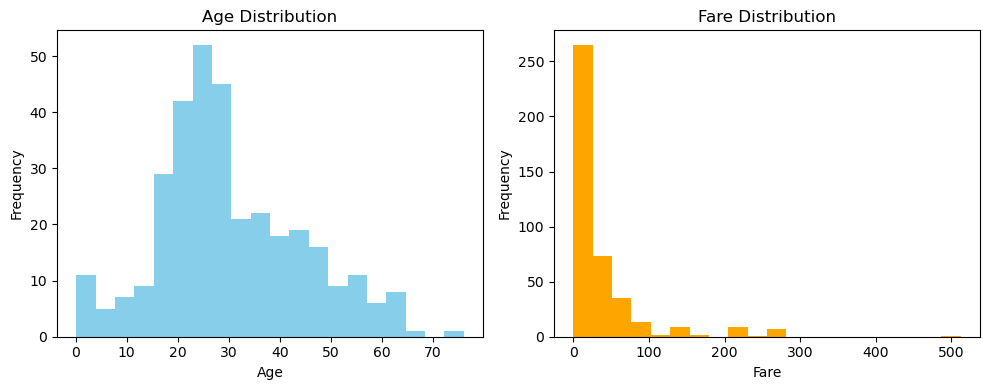

In [4]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.hist(data['Age'], bins=20, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')

plt.subplot(1, 2, 2)
plt.hist(data['Fare'], bins=20, color='orange')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Fare Distribution')

plt.tight_layout()
plt.show()


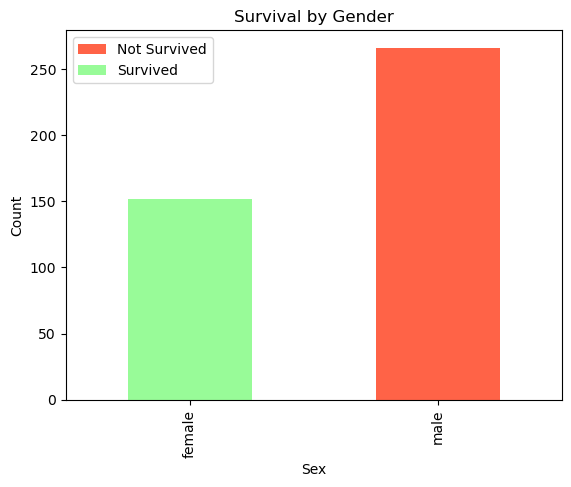

In [5]:
survived_by_gender = data.groupby('Sex')['Survived'].value_counts().unstack()
survived_by_gender.plot(kind='bar', stacked=True, color=['#FF6347', '#98FB98'])
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Survival by Gender')
plt.legend(['Not Survived', 'Survived'])
plt.show()


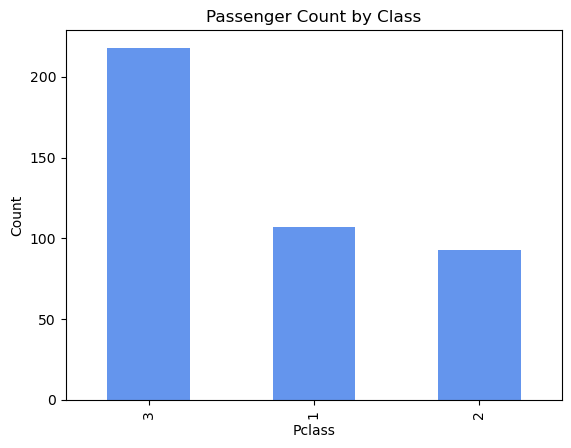

In [6]:
class_counts = data['Pclass'].value_counts()
class_counts.plot(kind='bar', color='cornflowerblue')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.title('Passenger Count by Class')
plt.show()


In [18]:

# Convert categorical variables into numerical form
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])
data['Embarked'] = label_encoder.fit_transform(data['Embarked'])

# Handle missing values
data.fillna(0, inplace=True)  # You may want to use more advanced imputation methods

# Define feature and target variables
X = data.drop(columns=['Survived'])
y = data['Survived']


In [19]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Assuming X and y are your features and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy_value = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display the evaluation metrics
print("Accuracy:", accuracy_value)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Accuracy: 1.0
Confusion Matrix:
 [[50  0]
 [ 0 34]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

# Create a pipeline with scaling and logistic regression
pipe = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))  # Increase max_iter as needed

# Train the model using the pipeline
pipe.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [21]:
# Support Vector Machines (SVM)
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_score = svm_model.score(X_test, y_test)

In [22]:
# Gradient Boosting
gradient_boosting = GradientBoostingClassifier()
gradient_boosting.fit(X_train, y_train)
gradient_boosting_score = gradient_boosting.score(X_test, y_test)

In [25]:
print(f"SVM Accuracy: {svm_score}")
print(f"Gradient Boosting Accuracy: {gradient_boosting_score}")

SVM Accuracy: 0.5952380952380952
Gradient Boosting Accuracy: 1.0
